---

# <center> ★ Machine Learning Project - Housing Price Prediction ★

---

<img src="hs.jpg" style="width: 400px;"/>

---

### Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

**Source**
Harrison, D. and Rubinfeld, D.L. (1978) Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.
Belsley D.A., Kuh, E. and Welsch, R.E. (1980) Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.


### Objective:
- Understand the Dataset & cleanup (if required).
- Build Regression models to predict the sales w.r.t a single & multiple feature.
- Also evaluate the models & compare thier respective scores like R2, RMSE, etc.

---

# <center>1. Data Exploration

In [18]:
#Importing the basic librarires

import math
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display

from statsmodels.formula import api
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10,6]

import warnings 
warnings.filterwarnings('ignore')

In [19]:
#Importing the dataset

df = pd.read_csv('Housing.csv')
target = 'price'
features = [i for i in df.columns if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Inference: The Datset consists of 13 features & 545 samples.


In [20]:
#Checking the dtypes of all the columns

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [21]:
#Checking number of unique rows in each feature

df.nunique()

price               219
area                284
bedrooms              6
bathrooms             4
stories               4
mainroad              2
guestroom             2
basement              2
hotwaterheating       2
airconditioning       2
parking               4
prefarea              2
furnishingstatus      3
dtype: int64

In [22]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=15:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 11 categorical features.


In [23]:
#Checking the stats of all the columns

display(df.describe())

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


**Inference:** The stats seem to be fine, let us do further analysis on the Dataset

---

# <center> 2. Exploratory Data Analysis (EDA)

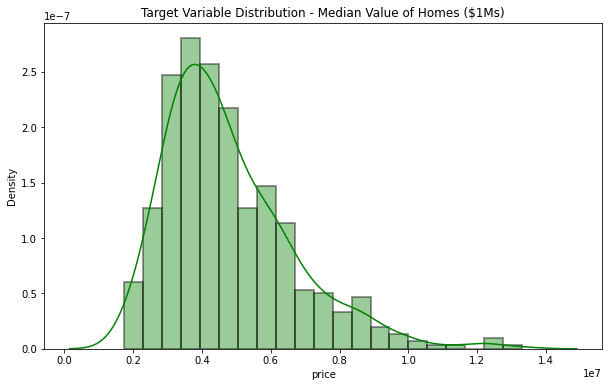

In [23]:
#Let us first analyze the distribution of the target variable

sns.distplot(df[target], color='g',hist_kws=dict(edgecolor="black", linewidth=2))
plt.title('Target Variable Distribution - Median Value of Homes ($1Ms)')
plt.show()

**Inference:**The Target Variable seems to be be normally distributed, averaging around $40000(units)

                               Visualising Categorical Features:                                


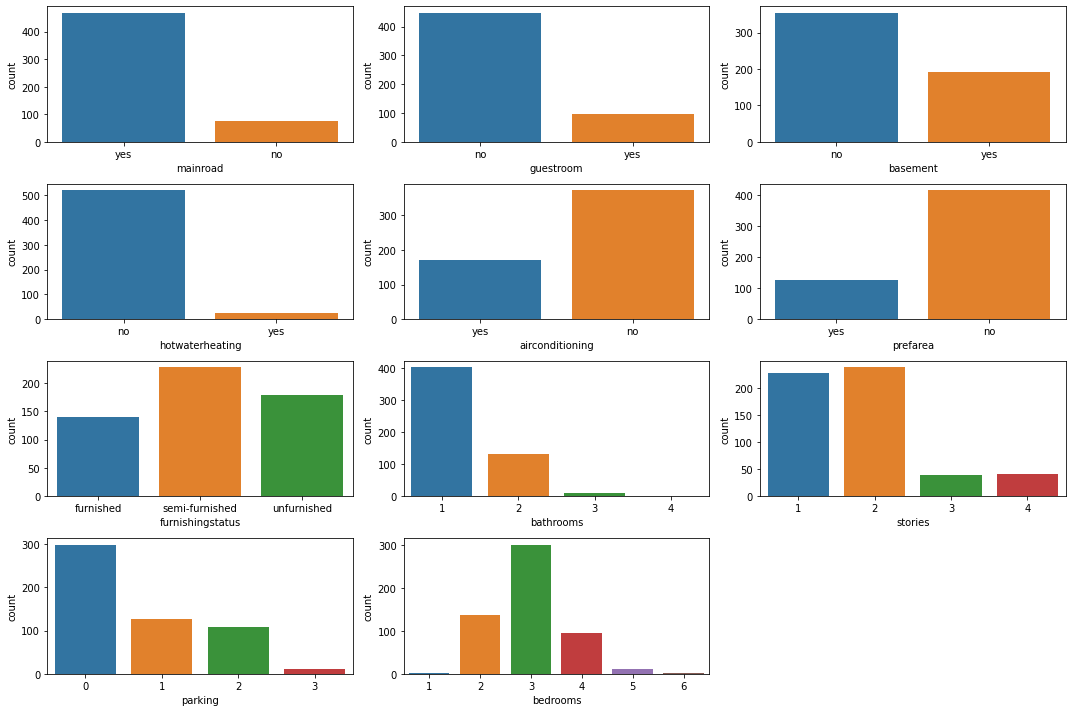

[10]


In [24]:
#Visualising the categorical features 

print('\033[1mVisualising Categorical Features:'.center(100))

n=3
plt.figure(figsize=[15,2.5*math.ceil(len(cf)/n)])

# for i in range(len(cf)):
#     if df[cf[i]].nunique()<=4:
#         plt.subplot(math.ceil(len(cf)/n),n,i+1)
#         sns.countplot(df[cf[i]])
#     else:
#         plt.subplot(math.ceil(len(cf)/2),2,i)
#         sns.countplot(df[cf[i]])

for i in range(len(cf)):
    if df[cf[i]].nunique()<=4:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
    else:
        plt.subplot(math.ceil(len(cf)/n),n,i+1)
        sns.countplot(df[cf[i]])
        #plt.subplot(4,2,8)
        #sns.countplot(df[cf[i]])
        
plt.tight_layout()
plt.show()

**Inference:** The categorical features distribution can be seen in the above plots.

                                                Numeric Features Distribution                                                 


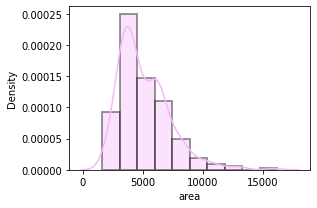

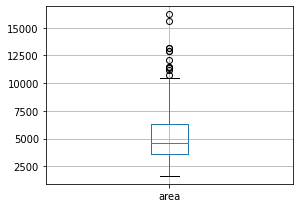

In [41]:
#Visualising the numeric features 

print('\033[1mNumeric Features Distribution'.center(130))

nf = [i for i in df.columns if i not in cf and [target]]
nf.remove('price')

plt.figure(figsize=[15,3])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    sns.distplot(df[nf[i]],hist_kws=dict(edgecolor="black", linewidth=2), bins=10, color=list(np.random.randint([255,255,255])/255))
plt.tight_layout()
plt.show()

plt.figure(figsize=[15,3])
for i in range(len(nf)):
    plt.subplot(math.ceil(len(nf)/3),4,i+1)
    df.boxplot(nf[i])
plt.tight_layout()
plt.show()

**Inference:** There seem to be some outliers. let us fix these in the upcoming section...

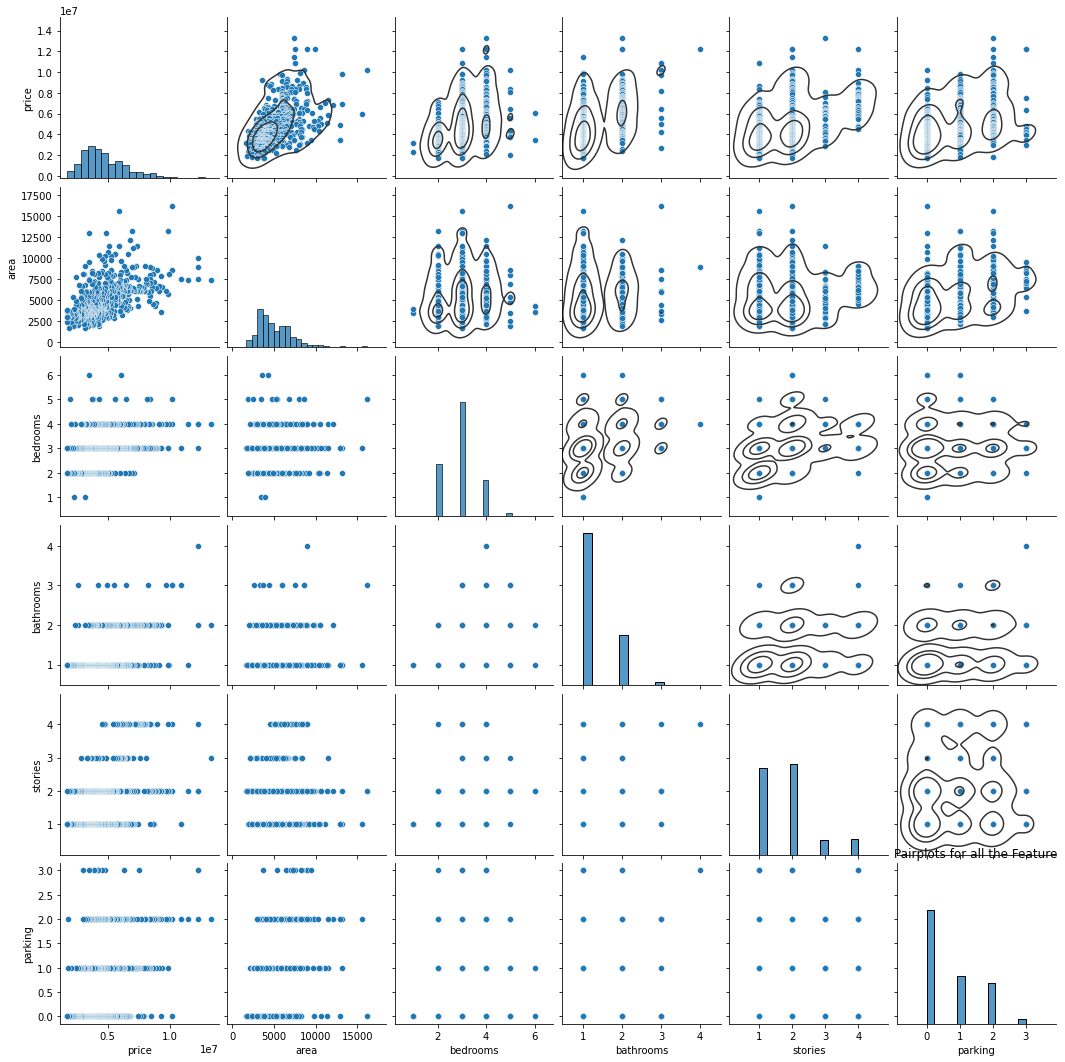

In [42]:
#Understanding the relationship between all the features

g = sns.pairplot(df)
plt.title('Pairplots for all the Feature')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Inference:** We can notice that some features have linear relationship, let us futher analyze the detect multicollinearity.

---

# <center> 3. Data Preprocessing

In [24]:
#Check for empty elements

print(df.isnull().sum())
print('\n\033[1mInference:\033[0m The dataset had {} inconsistant/null elements which were dropped.'.format(original_df.shape[0]-df.shape[0]))

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Inference: The dataset had 0 inconsistant/null elements which were dropped.


In [26]:
#Removal of any Duplicate rows (if any)

counter = 0
rs,cs = df.shape

df.drop_duplicates(inplace=True)

if df.shape==(rs,cs):
    print('\n\033[1mInference:\033[0m The dataset doesn\'t have any duplicates')
else:
    print(f'\n\033[1mInference:\033[0m Number of duplicates dropped/fixed ---> {r-df.shape[0]}')


Inference: The dataset doesn't have any duplicates


In [27]:
#Removal of outlier:

df1 = df.copy()

#features1 = [i for i in features if i not in ['CHAS','RAD']]
features1 = nf

for i in features1:
    Q1 = df1[i].quantile(0.25)
    Q3 = df1[i].quantile(0.75)
    IQR = Q3 - Q1
    df1 = df1[df1[i] <= (Q3+(1.5*IQR))]
    df1 = df1[df1[i] >= (Q1-(1.5*IQR))]
    df1 = df1.reset_index(drop=True)
display(df1.head())
print('\n\033[1mInference:\033[0m After removal of outliers, The dataset now has {} features & {} samples.'.format(df1.shape[1], df1.shape[0]))

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished



Inference: After removal of outliers, The dataset now has 13 features & 533 samples.


In [34]:
#Converting categorical Columns to Numeric

df3 = df1.copy()

#One-Hot Binay Encoding
oh=True
dm=True
for i in cf:
    #print(i)
    if df3[i].nunique()==2:
        if oh==True: print("\033[1mOne-Hot Encoding on features:\033[0m")
        print(i);oh=False
        df3[i]=pd.get_dummies(df3[i], drop_first=True, prefix=str(i))
    if (df3[i].nunique()>2 and df2[i].nunique()<15):
        if dm==True: print("\n\033[1mDummy Encoding on features:\033[0m")
        print(i);dm=False
        df3 = pd.concat([df3.drop([i], axis=1), pd.DataFrame(pd.get_dummies(df3[i], drop_first=True, prefix=str(i)))],axis=1)
    

One-Hot Encoding on features:
mainroad
guestroom
basement
hotwaterheating
airconditioning
prefarea

Dummy Encoding on features:
furnishingstatus
bathrooms
stories
parking
bedrooms


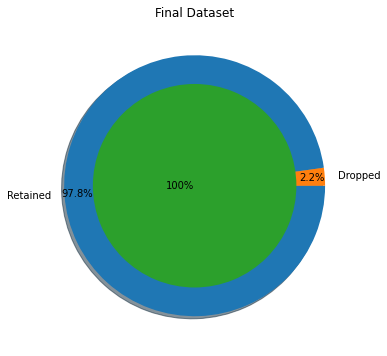


Inference: After the cleanup process, 12 samples were dropped, while retaining 2.2% of the data.


In [46]:
#Final Dataset size after performing Preprocessing

df = df3.copy()
df.columns=[i.replace('-','_') for i in df.columns]

plt.title('Final Dataset')
plt.pie([df.shape[0], original_df.shape[0]-df.shape[0]], radius = 1, labels=['Retained','Dropped'], counterclock=False, 
        autopct='%1.1f%%', pctdistance=0.9, explode=[0,0], shadow=True)
plt.pie([df.shape[0]], labels=['100%'], labeldistance=-0, radius=0.78)
plt.show()

print(f'\n\033[1mInference:\033[0m After the cleanup process, {original_df.shape[0]-df.shape[0]} samples were dropped, \
while retaining {round(100 - (df.shape[0]*100/(original_df.shape[0])),2)}% of the data.')

---

# <center> 4. Data Manipulation

In [47]:
#Splitting the data intro training & testing sets

X = df.drop([target],axis=1)
Y = df[target]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)
Train_X.reset_index(drop=True,inplace=True)

print('Original set  ---> ',X.shape,Y.shape,'\nTraining set  ---> ',Train_X.shape,Train_Y.shape,'\nTesting set   ---> ', Test_X.shape,'', Test_Y.shape)

Original set  --->  (533, 23) (533,) 
Training set  --->  (426, 23) (426,) 
Testing set   --->  (107, 23)  (107,)


In [48]:
#Feature Scaling (Standardization)

std = StandardScaler()

print('\033[1mStandardardization on Training set'.center(120))
Train_X_std = std.fit_transform(Train_X)
Train_X_std = pd.DataFrame(Train_X_std, columns=X.columns)
display(Train_X_std.describe())

print('\n','\033[1mStandardardization on Testing set'.center(120))
Test_X_std = std.transform(Test_X)
Test_X_std = pd.DataFrame(Test_X_std, columns=X.columns)
display(Test_X_std.describe())

                                         Standardardization on Training set                                         


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-6.463270e-17,9.799152e-17,-2.501911e-17,1.250956e-17,-3.544374e-17,1.355202e-17,-2.918896e-17,-1.876433e-17,-3.752867e-17,2.084926e-17,...,2.501911e-17,1.667941e-17,-1.459448e-17,-1.355202e-17,8.339703e-17,-8.756689e-17,2.501911e-17,1.667941e-17,8.339703e-17,-4.169852e-18
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-1.797874e+00,-2.335497e+00,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
25%,-7.487891e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,-1.078164e+00,-4.585055e-01,-1.469106e-01,-4.850713e-02
50%,-2.551019e-01,4.281744e-01,-4.659859e-01,-7.562775e-01,-2.038745e-01,-6.811149e-01,-5.393599e-01,-8.431153e-01,-6.996503e-01,-5.791573e-01,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,-5.972335e-01,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
75%,6.110159e-01,4.281744e-01,-4.659859e-01,1.322266e+00,-2.038745e-01,1.468181e+00,-5.393599e-01,1.186077e+00,1.429286e+00,1.150196e+00,...,-2.702737e-01,-2.752409e-01,-5.466082e-01,-4.919172e-01,-1.469106e-01,1.674387e+00,9.275031e-01,-4.585055e-01,-1.469106e-01,-4.850713e-02
max,2.992840e+00,4.281744e-01,2.145988e+00,1.322266e+00,4.904979e+00,1.468181e+00,1.854050e+00,1.186077e+00,1.429286e+00,1.726647e+00,...,3.699953e+00,3.633180e+00,1.829464e+00,2.032863e+00,6.806859e+00,1.674387e+00,9.275031e-01,2.180999e+00,6.806859e+00,2.061553e+01



                                          Standardardization on Testing set                                          


,area,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea,furnishingstatus_semi_furnished,furnishingstatus_unfurnished,bathrooms_2,...,stories_3,stories_4,parking_1,parking_2,parking_3,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6
count,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,...,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,107.000000,1.070000e+02,107.000000
mean,0.025531,0.144059,0.022233,-0.154083,0.130350,0.001839,0.042216,0.029248,0.016627,-0.040418,...,0.063671,0.126559,0.008549,-0.019996,0.048055,-0.130171,0.121488,0.010192,-1.469106e-01,0.144615
std,1.021135,0.843283,1.023054,0.947331,1.269193,1.005431,1.031339,1.009305,1.010644,0.980290,...,1.107146,1.192583,1.010164,0.988902,1.153328,0.922384,0.987957,1.013435,2.788619e-17,1.997668
min,-1.635477,-2.335497,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,-1.078164,-0.458505,-1.469106e-01,-0.048507
25%,-0.809959,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,-1.078164,-0.458505,-1.469106e-01,-0.048507
50%,-0.200970,0.428174,-0.465986,-0.756278,-0.203874,-0.681115,-0.539360,-0.843115,-0.699650,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,0.927503,-0.458505,-1.469106e-01,-0.048507
75%,0.762586,0.428174,-0.465986,1.322266,-0.203874,1.468181,-0.539360,1.186077,1.429286,-0.579157,...,-0.270274,-0.275241,-0.546608,-0.491917,-0.146911,-0.597234,0.927503,-0.458505,-1.469106e-01,-0.048507
max,2.867794,0.428174,2.145988,1.322266,4.904979,1.468181,1.854050,1.186077,1.429286,1.726647,...,3.699953,3.633180,1.829464,2.032863,6.806859,1.674387,0.927503,2.180999,-1.469106e-01,20.615528


---

# <center> 5. Feature Selection/Extraction

                             Correlation Matrix                             


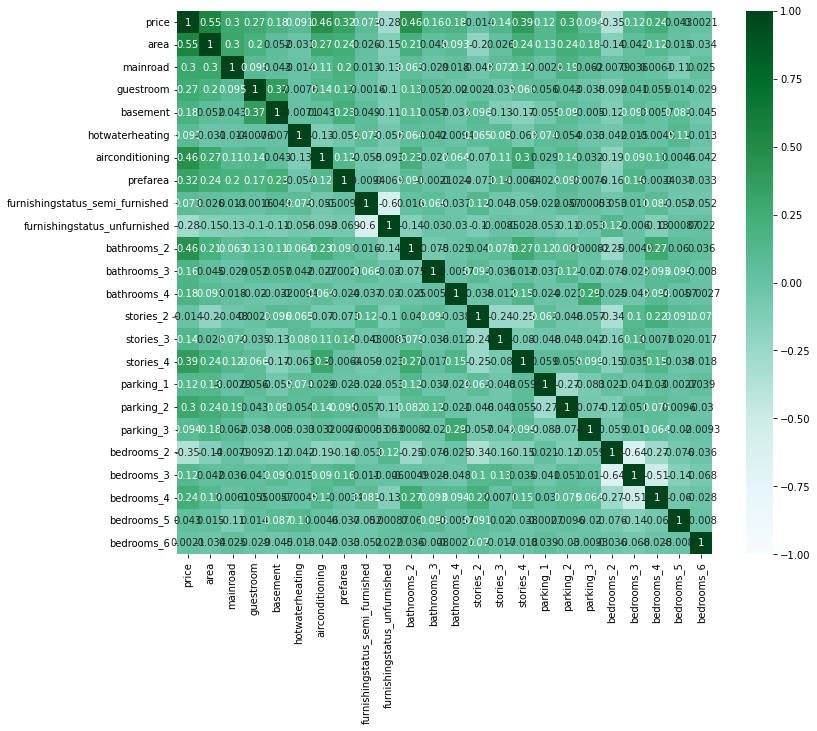

In [49]:
#Checking the correlation

print('\033[1mCorrelation Matrix'.center(80))
plt.figure(figsize=[12,10])
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, cmap='BuGn') #center=0, 
plt.show()

**Inference:** There seems to be strong multi-correlation between the features. Let us try to fix these...

In [50]:
#Testing a Linear Regression model with statsmodels

Train_xy = pd.concat([Train_X_std,Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in Train_X.columns)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.679
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     36.96
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.06e-84
Time:                        22:46:13   Log-Likelihood:                -6509.2
No. Observations:                 426   AIC:                         1.307e+04
Df Residuals:                     402   BIC:                         1.316e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.717e+06   5.22e+04     90.378      0.000    4.61e+06    4.82e+06
area                             4.356e+05   6.41e+04      6.799      0.000     3.1e+05    5.62e+05
mainroad                         1.785e+05   5.77e+04      3.092      0.002     6.5e+04    2.92e+05
guestroom                        1.197e+05   5.78e+04      2.071      0.039    6082.572    2.33e+05
basement                         1.712e+05   6.15e+04      2.784      0.006    5.03e+04    2.92e+05
hotwaterheating                  2.006e+05   5.48e+04      3.662      0.000    9.29e+04    3.08e+05
airconditioning                  3.635e+05   5.89e+04      6.168      0.000    2.48e+05    4.79e+05
prefarea                         2.711e+05   5.75e+04      4.711      0.000    1.58e+05    3.84e+05
furnishingstatus_semi_furnished  1.509e+04   6.71e+04      0.225      0.822   -1.17e+05    1.47e+05
furnishingstatus_unfurnished    -1.688e+05   6.78e+04     -2.489      0.013   -3.02e+05   -3.55e+04
bathrooms_2                      3.722e+05   5.98e+04      6.224      0.000    2.55e+05     4.9e+05
bathrooms_3                      1.886e+05    5.4e+04      3.492      0.001    8.24e+04    2.95e+05
bathrooms_4                      2.801e+05   5.68e+04      4.934      0.000    1.69e+05    3.92e+05
stories_2                        1.341e+05   6.97e+04      1.923      0.055   -2986.085    2.71e+05
stories_3                        2.289e+05   6.13e+04      3.735      0.000    1.08e+05    3.49e+05
stories_4                        3.725e+05   6.46e+04      5.764      0.000    2.45e+05       5e+05
parking_1                         1.67e+05   5.78e+04      2.887      0.004    5.33e+04    2.81e+05
parking_2                        2.781e+05   5.97e+04      4.662      0.000    1.61e+05    3.95e+05
parking_3                       -5.772e+04   5.72e+04     -1.009      0.314    -1.7e+05    5.47e+04
bedrooms_2                      -3.385e+04    4.8e+05     -0.070      0.944   -9.78e+05    9.11e+05
bedrooms_3                       1.077e+05   5.45e+05      0.197      0.844   -9.64e+05    1.18e+06
bedrooms_4                       1.215e+05   4.18e+05      0.291      0.771      -7e+05    9.43e+05
bedrooms_5                       3.933e+04   1.66e+05      0.237      0.812   -2.86e+05    3.65e+05
bedrooms_6                       8.462e+04   7.49e+04      1.130      0.259   -6.26e+04    2.32e+05
==============================================================================
Omnibus:                       96.025   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              274.474
Skew:                           1.058   Prob(JB):                     2.51e-60
Kurtosis:                       6.315   Cond. No.                  

 ---

**Inference:** 
We can fix these multicollinearity with two techniques:
1. Manual Method - Variance Inflation Factor (VIF)
2. Automatic Method - Recursive Feature Elimination (RFE)

## 5a. Manual Method - VIF

In [134]:
# A function to calculate the VIFs to remove multicollinearity

DROP=[]

def vif_cal(d):
    vif = pd.DataFrame()
    X = Train_xy.drop([target]+DROP,axis=1)
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    vif.reset_index(drop=True, inplace=True)
    return vif.loc[0,'Features']

In [141]:
#Final Model Features shortlisted with VIF

DROP.append(vif_cal(DROP))
print('Dropped Features --> ',DROP)

a = Train_xy.drop([target]+DROP, axis=1).columns.values
API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
API.summary()

Dropped Features -->  ['bedrooms_3', 'stories_2', 'furnishingstatus_unfurnished', 'area', 'basement', 'bathrooms_2', 'airconditioning']


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.528
Model:                            OLS   Adj. R-squared:                  0.510
Method:                 Least Squares   F-statistic:                     28.65
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           6.84e-57
Time:                        23:13:27   Log-Likelihood:                -6591.0
No. Observations:                 426   AIC:                         1.322e+04
Df Residuals:                     409   BIC:                         1.328e+04
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept                        4.717e+06   6.27e+04     75.228      0.000    4.59e+06    4.84e+06
mainroad                         2.923e+05   6.65e+04      4.392      0.000    1.61e+05    4.23e+05
guestroom                        2.923e+05   6.42e+04      4.557      0.000    1.66e+05    4.18e+05
hotwaterheating                  1.668e+05   6.48e+04      2.575      0.010    3.95e+04    2.94e+05
prefarea                         4.308e+05   6.65e+04      6.474      0.000       3e+05    5.62e+05
furnishingstatus_semi_furnished  1.351e+05   6.44e+04      2.099      0.036    8580.194    2.62e+05
bathrooms_3                      1.484e+05   6.43e+04      2.307      0.022    2.19e+04    2.75e+05
bathrooms_4                      2.782e+05   6.77e+04      4.107      0.000    1.45e+05    4.11e+05
stories_3                         2.19e+05   6.59e+04      3.321      0.001    8.93e+04    3.49e+05
stories_4                         5.46e+05   6.59e+04      8.282      0.000    4.16e+05    6.76e+05
parking_1                        3.301e+05   6.65e+04      4.964      0.000    1.99e+05    4.61e+05
parking_2                        4.579e+05   6.85e+04      6.682      0.000    3.23e+05    5.93e+05
parking_3                        1.836e+04   6.75e+04      0.272      0.786   -1.14e+05    1.51e+05
bedrooms_2                      -3.132e+05    6.9e+04     -4.542      0.000   -4.49e+05   -1.78e+05
bedrooms_4                       1.825e+05   6.65e+04      2.745      0.006    5.18e+04    3.13e+05
bedrooms_5                        1.06e+05   6.49e+04      1.631      0.104   -2.17e+04    2.34e+05
bedrooms_6                       1.125e+05    6.3e+04      1.785      0.075   -1.14e+04    2.36e+05
==============================================================================
Omnibus:                       87.594   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              200.773
Skew:                           1.049   Prob(JB):                     2.53e-44
Kurtosis:                       5.629   Cond. No.                         1.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 5b. Automatic Method - RFE

In [169]:
# Applyin

# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(Train_X_std, Train_Y)

rfe = RFE(lm,n_features_to_select=13)             # running RFE
rfe = rfe.fit(Train_X, Train_Y)

Train_xy = pd.concat([Train_X_std[Train_X.columns[rfe.support_]],Train_Y.reset_index(drop=True)],axis=1)
a = Train_xy.columns.values.tolist()
a.remove(target)

API = api.ols(formula='{} ~ {}'.format(target,' + '.join(i for i in a)), data=Train_xy).fit()
#print(API.conf_int())
#print(API.pvalues)
API.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.595
Method:                 Least Squares   F-statistic:                     49.08
Date:                Tue, 30 Nov 2021   Prob (F-statistic):           2.65e-75
Time:                        23:27:42   Log-Likelihood:                -6551.9
No. Observations:                 426   AIC:                         1.313e+04
Df Residuals:                     412   BIC:                         1.319e+04
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        4.717e+06    5.7e+04     82.769      0.000     4.6e+06    4.83e+06
mainroad         2.739e+05   5.98e+04      4.577      0.000    1.56e+05    3.92e+05
guestroom        2.372e+05   5.86e+04      4.050      0.000    1.22e+05    3.52e+05
hotwaterheating   2.32e+05    5.9e+04      3.935      0.000    1.16e+05    3.48e+05
airconditioning  4.572e+05   6.31e+04      7.248      0.000    3.33e+05    5.81e+05
prefarea         3.689e+05   6.02e+04      6.127      0.000    2.51e+05    4.87e+05
bathrooms_2      5.122e+05   6.19e+04      8.274      0.000     3.9e+05    6.34e+05
bathrooms_3      2.441e+05   5.81e+04      4.204      0.000     1.3e+05    3.58e+05
bathrooms_4      3.209e+05   5.82e+04      5.514      0.000    2.06e+05    4.35e+05
stories_3        1.819e+05   5.91e+04      3.079      0.002    6.58e+04    2.98e+05
stories_4        3.259e+05    6.3e+04      5.170      0.000    2.02e+05     4.5e+05
parking_1        2.289e+05   6.08e+04      3.767      0.000    1.09e+05    3.48e+05
parking_2        3.956e+05   6.23e+04      6.349      0.000    2.73e+05    5.18e+05
bedrooms_6       7.452e+04   5.75e+04      1.297      0.195   -3.84e+04    1.87e+05
==============================================================================
Omnibus:                      111.763   Durbin-Watson:                   1.938
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              357.090
Skew:                           1.190   Prob(JB):                     2.88e-78
Kurtosis:                       6.802   Cond. No.                         1.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Conclusion:
It is clear that both manual & automatic methods intend to drop few varibles, but comparing both models, we can see that following dropping the columns recommended by RFE Technique gave better generalizability & prevent issue of multicollinearity.

---

# <center> 6. Predictive Modelling

In [174]:
#Let us first define a function to evaluate our models

Model_Evaluation_Comparison_Matrix = pd.DataFrame(np.zeros([5,8]), columns=['Train-R2','Test-R2','Train-RSS','Test-RSS',
                                                                            'Train-MSE','Test-MSE','Train-RMSE','Test-RMSE'])

def Evaluate(n, pred1,pred2):
    #Plotting predicted predicteds alongside the actual datapoints 
    plt.figure(figsize=[15,6])
    for e,i in enumerate(Train_X_std):
        if Train_X_std[i].nunique()>=20:
            plt.subplot(2,3,e+1)
            plt.scatter(y=Train_Y, x=Train_X_std[i], label='Actual')
            plt.scatter(y=pred, x=Train_X_std[i], label='Prediction')
            plt.legend()
    plt.show()

    #Evaluating the Multiple Linear Regression Model

    print('\n\n{}Training Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Training set --->',round(r2_score(Train_Y, pred1),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Train_Y-pred1)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Train_Y, pred1),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))

    print('\n{}Testing Set Metrics{}'.format('-'*20, '-'*20))
    print('\nR2-Score on Testing set --->',round(r2_score(Test_Y, pred2),2))
    print('Residual Sum of Squares (RSS) on Training set  --->',round(np.sum(np.square(Test_Y-pred2)),2))
    print('Mean Squared Error (MSE) on Training set       --->',round(mean_squared_error(Test_Y, pred2),2))
    print('Root Mean Squared Error (RMSE) on Training set --->',round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))
    print('\n{}Residual Plots{}'.format('-'*20, '-'*20))
    
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-R2']  = round(r2_score(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-R2']   = round(r2_score(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RSS'] = round(np.sum(np.square(Train_Y-pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RSS']  = round(np.sum(np.square(Test_Y-pred2)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-MSE'] = round(mean_squared_error(Train_Y, pred1),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-MSE']  = round(mean_squared_error(Test_Y, pred2),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Train-RMSE']= round(np.sqrt(mean_squared_error(Train_Y, pred1)),2)
    Model_Evaluation_Comparison_Matrix.loc[n,'Test-RMSE'] = round(np.sqrt(mean_squared_error(Test_Y, pred2)),2)

    # Plotting y_test and y_pred to understand the spread.
    plt.figure(figsize=[15,4])

    plt.subplot(1,2,1)
    sns.distplot((Train_Y - pred))
    plt.title('Error Terms')          
    plt.xlabel('Errors') 

    plt.subplot(1,2,2)
    plt.scatter(Train_Y,pred)
    plt.plot([Train_Y.min(),Train_Y.max()],[Train_Y.min(),Train_Y.max()], 'r--')
    plt.title('Test vs Prediction')         
    plt.xlabel('y_test')                       
    plt.ylabel('y_pred')                       
    plt.show()

---

**Objective:** Let us now try building multiple regression models & compare their evaluation metrics to choose the best fit model both training and testing sets...

## 6a. Multiple Linear Regression(MLR)

<img src="mr.png" style="width: 600px;float: left;"/>

<<<----------------------------------- Evaluating Multiple Linear Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [273907.62535685 237172.18944266 232024.77109586 457196.45204963
 368908.35156201 512189.11023171 244109.88171956 320912.80217085
 181932.14185606 325908.9240387  228854.50043496 395630.22952358
  74515.2472524 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


<Figure size 1080x432 with 0 Axes>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.61
Residual Sum of Squares (RSS) on Training set  ---> 569969960019091.0
Mean Squared Error (MSE) on Training set       ---> 1337957652626.97
Root Mean Squared Error (RMSE) on Training set ---> 1156701.19

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.58
Residual Sum of Squares (RSS) on Training set  ---> 154438429123103.22
Mean Squared Error (MSE) on Training set       ---> 1443349804888.82
Root Mean Squared Error (RMSE) on Training set ---> 1201394.94

--------------------Residual Plots--------------------


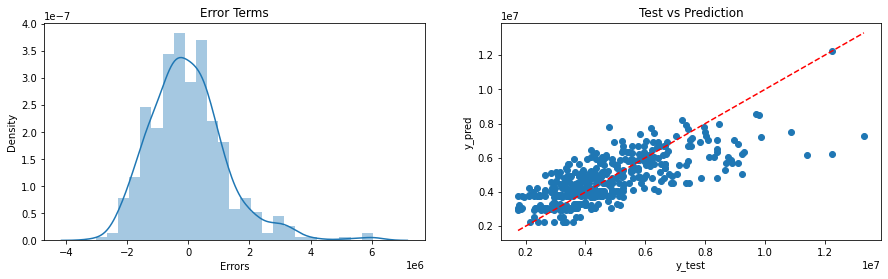

In [175]:

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

MLR = LinearRegression().fit(Train_X_std,Train_Y)
pred1 = MLR.predict(Train_X_std)
pred2 = MLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Multiple Linear Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(0, pred1, pred2)

---

## 6b. Ridge Regression Model

<img src="ridge.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Ridge Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [273907.62535685 237172.18944266 232024.77109586 457196.45204963
 368908.35156201 512189.11023171 244109.88171956 320912.80217085
 181932.14185606 325908.9240387  228854.50043496 395630.22952358
  74515.2472524 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


<Figure size 1080x432 with 0 Axes>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.61
Residual Sum of Squares (RSS) on Training set  ---> 569972051202346.8
Mean Squared Error (MSE) on Training set       ---> 1337962561507.86
Root Mean Squared Error (RMSE) on Training set ---> 1156703.32

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.58
Residual Sum of Squares (RSS) on Training set  ---> 154384856182436.38
Mean Squared Error (MSE) on Training set       ---> 1442849123200.34
Root Mean Squared Error (RMSE) on Training set ---> 1201186.55

--------------------Residual Plots--------------------


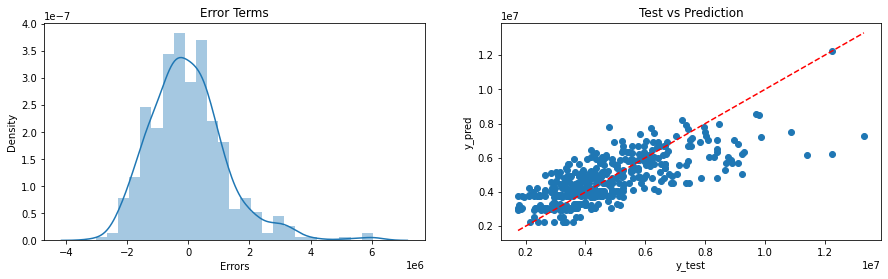

In [176]:
#Creating a Ridge Regression model

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

RLR = Ridge().fit(Train_X_std,Train_Y)
pred1 = RLR.predict(Train_X_std)
pred2 = RLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Ridge Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(1, pred1, pred2)

---

## 6c. Lasso Regression Model

<img src="lasso.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Lasso Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [273907.62535685 237172.18944266 232024.77109586 457196.45204963
 368908.35156201 512189.11023171 244109.88171956 320912.80217085
 181932.14185606 325908.9240387  228854.50043496 395630.22952358
  74515.2472524 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


<Figure size 1080x432 with 0 Axes>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.61
Residual Sum of Squares (RSS) on Training set  ---> 569969960023377.8
Mean Squared Error (MSE) on Training set       ---> 1337957652637.04
Root Mean Squared Error (RMSE) on Training set ---> 1156701.19

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.58
Residual Sum of Squares (RSS) on Training set  ---> 154438267145635.9
Mean Squared Error (MSE) on Training set       ---> 1443348291080.71
Root Mean Squared Error (RMSE) on Training set ---> 1201394.31

--------------------Residual Plots--------------------


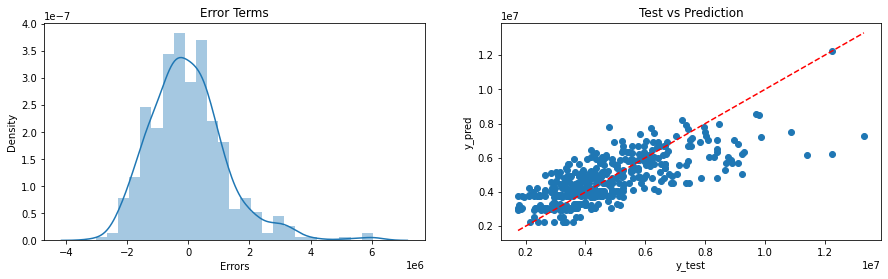

In [177]:
#Creating a Ridge Regression model

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

LLR = Lasso().fit(Train_X_std,Train_Y)
pred1 = LLR.predict(Train_X_std)
pred2 = LLR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Lasso Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(2, pred1, pred2)

---

## 6d. Elastic-Net Regression

<img src="en.png" style="width: 500px;float: left;"/>

<<<----------------------------------- Evaluating Elastic-Net Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [273907.62535685 237172.18944266 232024.77109586 457196.45204963
 368908.35156201 512189.11023171 244109.88171956 320912.80217085
 181932.14185606 325908.9240387  228854.50043496 395630.22952358
  74515.2472524 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


<Figure size 1080x432 with 0 Axes>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.57
Residual Sum of Squares (RSS) on Training set  ---> 621312022944221.9
Mean Squared Error (MSE) on Training set       ---> 1458478927099.11
Root Mean Squared Error (RMSE) on Training set ---> 1207675.01

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.57
Residual Sum of Squares (RSS) on Training set  ---> 160227640834179.2
Mean Squared Error (MSE) on Training set       ---> 1497454587235.32
Root Mean Squared Error (RMSE) on Training set ---> 1223705.27

--------------------Residual Plots--------------------


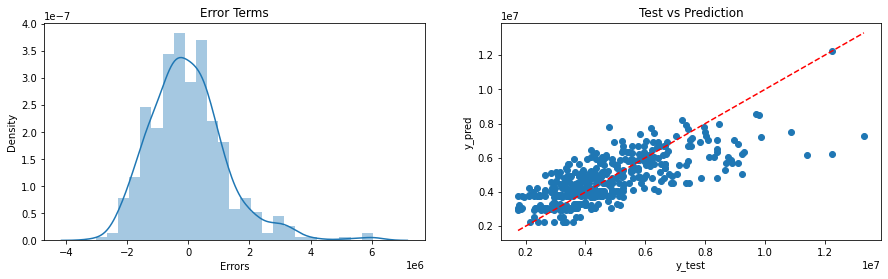

In [178]:
#Creating a ElasticNet Regression model

Train_X_std = Train_X_std[Train_X.columns[rfe.support_]]
Test_X_std = Test_X_std[Test_X.columns[rfe.support_]]

ENR = ElasticNet().fit(Train_X_std,Train_Y)
pred1 = ENR.predict(Train_X_std)
pred2 = ENR.predict(Test_X_std)

print('{}{}\033[1m Evaluating Elastic-Net Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(3, pred1, pred2)

---

## 6e. Polynomial Regression Model

<img src="pn.png" style="width: 500px;float: left;"/>

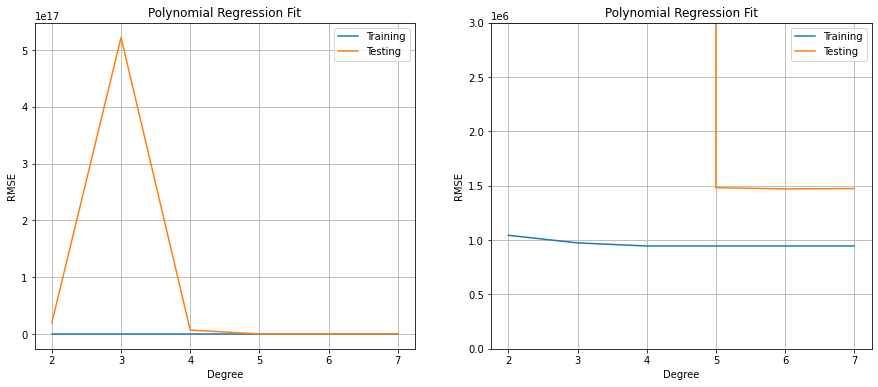

In [198]:
#Checking polynomial regression performance on various degrees

Trr=[]; Tss=[]
n_degree=8

for i in range(2,n_degree):
    #print(f'{i} Degree')
    poly_reg = PolynomialFeatures(degree=i)
    X_poly = poly_reg.fit_transform(Train_X_std)
    X_poly1 = poly_reg.fit_transform(Test_X_std)
    LR = LinearRegression()
    LR.fit(X_poly, Train_Y)
    
    pred1 = LR.predict(X_poly)
    Trr.append(round(np.sqrt(mean_squared_error(Train_Y, pred1)),2))
    
    pred2 = LR.predict(X_poly1)
    Tss.append(round(np.sqrt(mean_squared_error(Test_Y, pred2)),2))

plt.figure(figsize=[15,6])
plt.subplot(1,2,1)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
#plt.plot([1,4],[1,4],'b--')
plt.title('Polynomial Regression Fit')
#plt.ylim([0,5])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()

plt.subplot(1,2,2)
plt.plot(range(2,n_degree),Trr, label='Training')
plt.plot(range(2,n_degree),Tss, label='Testing')
plt.title('Polynomial Regression Fit')
plt.ylim([0,3000000])
plt.xlabel('Degree')
plt.ylabel('RMSE')
plt.grid()
plt.legend()
#plt.xticks()
plt.show()

**Inference:** We can choose 3rd order polynomial regression as it gives the optimal training & testing scores...

<<<----------------------------------- Evaluating Polynomial Regression Model ----------------------------------->>>

The Coeffecient of the Regresion Model was found to be  [273907.62535685 237172.18944266 232024.77109586 457196.45204963
 368908.35156201 512189.11023171 244109.88171956 320912.80217085
 181932.14185606 325908.9240387  228854.50043496 395630.22952358
  74515.2472524 ]
The Intercept of the Regresion Model was found to be  4716708.779342723


<Figure size 1080x432 with 0 Axes>



--------------------Training Set Metrics--------------------

R2-Score on Training set ---> 0.74
Residual Sum of Squares (RSS) on Training set  ---> 380982908417118.4
Mean Squared Error (MSE) on Training set       ---> 894326076096.52
Root Mean Squared Error (RMSE) on Training set ---> 945688.15

--------------------Testing Set Metrics--------------------

R2-Score on Testing set ---> 0.37
Residual Sum of Squares (RSS) on Training set  ---> 234825583507169.3
Mean Squared Error (MSE) on Training set       ---> 2194631621562.33
Root Mean Squared Error (RMSE) on Training set ---> 1481428.91

--------------------Residual Plots--------------------


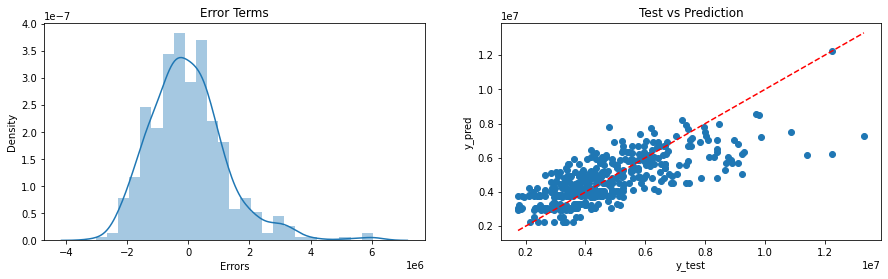

In [213]:
#Using the 4rd Order Polynomial Regression model (degree=3)

poly_reg = PolynomialFeatures(degree=5)
X_poly = poly_reg.fit_transform(Train_X_std)
X_poly1 = poly_reg.fit_transform(Test_X_std)
PR = LinearRegression()
PR.fit(X_poly, Train_Y)

pred1 = PR.predict(X_poly)
pred2 = PR.predict(X_poly1)

print('{}{}\033[1m Evaluating Polynomial Regression Model \033[0m{}{}\n'.format('<'*3,'-'*35 ,'-'*35,'>'*3))
print('The Coeffecient of the Regresion Model was found to be ',MLR.coef_)
print('The Intercept of the Regresion Model was found to be ',MLR.intercept_)

Evaluate(4, pred1, pred2)

---

### 6f. Comparing the Evaluation Metics of the Models

In [214]:
# Regression Models Results Evaluation

EMC = Model_Evaluation_Comparison_Matrix.copy()
EMC.index = ['Multiple Linear Regression (MLR)','Ridge Linear Regression (RLR)','Lasso Linear Regression (LLR)','Elastic-Net Regression (ENR)','Polynomial Regression (PNR)']
EMC

,Train-R2,Test-R2,Train-RSS,Test-RSS,Train-MSE,Test-MSE,Train-RMSE,Test-RMSE
Multiple Linear Regression (MLR),0.61,0.58,5.699700e+14,1.544384e+14,1.337958e+12,1.443350e+12,1156701.19,1201394.94
Ridge Linear Regression (RLR),0.61,0.58,5.699721e+14,1.543849e+14,1.337963e+12,1.442849e+12,1156703.32,1201186.55
Lasso Linear Regression (LLR),0.61,0.58,5.699700e+14,1.544383e+14,1.337958e+12,1.443348e+12,1156701.19,1201394.31
Elastic-Net Regression (ENR),0.57,0.57,6.213120e+14,1.602276e+14,1.458479e+12,1.497455e+12,1207675.01,1223705.27
Polynomial Regression (PNR),0.74,0.37,3.809829e+14,2.348256e+14,8.943261e+11,2.194632e+12,945688.15,1481428.91


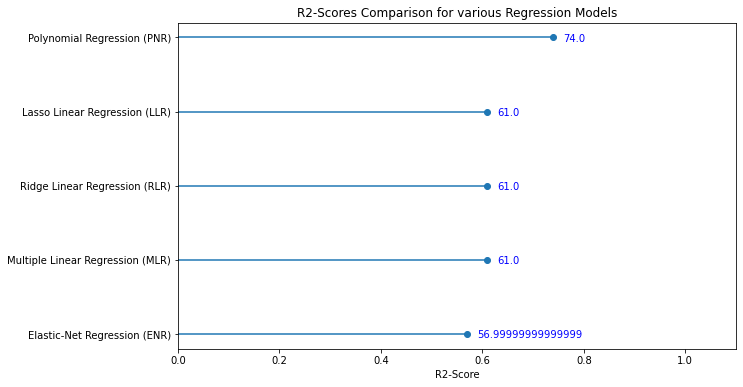

In [215]:
# R2-Scores Comparison for different Regression Models

R2 = EMC['Train-R2'].sort_values(ascending=True)
plt.hlines(y=R2.index, xmin=0, xmax=R2.values)
plt.plot(R2.values, R2.index,'o')
plt.title('R2-Scores Comparison for various Regression Models')
plt.xlabel('R2-Score')
#plt.ylabel('Regression Models')
for i, v in enumerate(R2):
    plt.text(v+0.02, i-0.05, str(v*100), color='blue')
plt.xlim([0,1.1])
plt.show()

**Inference:** From the above plot, it is clear that the polynomial regresion models have the highest explainability power  to understand the dataset.

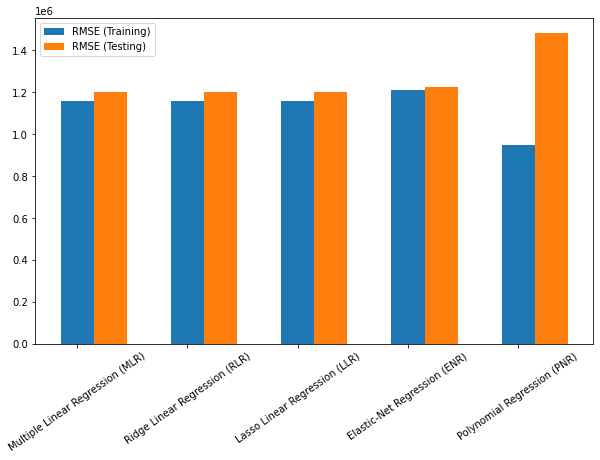

In [216]:
# Root Mean SquaredError Comparison for different Regression Models

cc = Model_Evaluation_Comparison_Matrix.columns.values
s=5

plt.bar(np.arange(s), Model_Evaluation_Comparison_Matrix[cc[-2]].values, width=0.3, label='RMSE (Training)')
plt.bar(np.arange(s)+0.3, Model_Evaluation_Comparison_Matrix[cc[-1]].values, width=0.3, label='RMSE (Testing)')
plt.xticks(np.arange(s),EMC.index, rotation =35)
plt.legend()
plt.show()

**Inference:** The polynomial regression slightly overfits on the data.
For this problem, it is can be said that any simple regression can be a good choice to go with...

---

## <center> 10. Project Outcomes & Conclusions

---

### Here are some of the key outcomes of the project:
- The Dataset was quiet small totally just 545 samples & after preprocessing 2.2% of the datasamples were dropped. 
- Visualising the distribution of data & their relationships, helped us to get some insights on the feature-set.
- The features had high multicollinearity, hence in Feature Extraction step, we used VIF & RFE Techniques to drop highly correlated features.
- Testing multiple algorithms with default hyperparamters gave us some understanding for various models performance on this specific dataset.
- While, Polynomial Regression (Order-5) was slightly overfitting, it is safe to use multiple regression algorithm, as their scores were quiet comparable & also they're more generalisable.

In [ ]:
<<<----------------------------------------------THE END---------------------------------------------------------->>>